## Anomaly detection for transaction data.

In [4]:
import os
os.chdir(r'F:\practice\fraud0')

In [6]:
import pandas as pd
df = pd.read_csv('AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

After count the missing value of each column, we can see there is no missing value at each column. So it's safe to use the data directly.

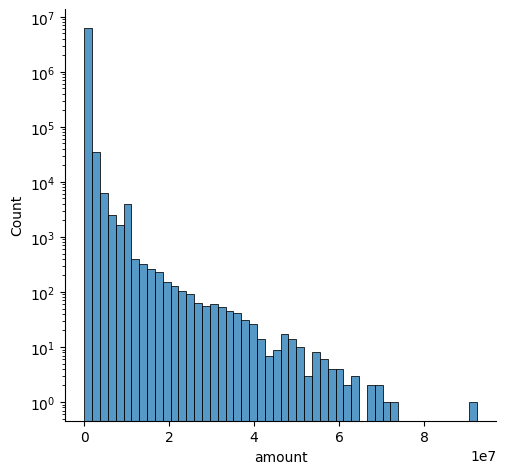

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df,x='amount',bins=50)
plt.yscale('log')
plt.show()

- Most transactions involve relatively small amounts, while a small number of transactions are significantly larger.

In [18]:
(df['isFraud'].value_counts())/len(df)*100

isFraud
0    99.870918
1     0.129082
Name: count, dtype: float64

- This is highly imbalanced data where minority class (fraud) is only 0.13%.

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [23]:
X=df.loc[:,['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [30]:
X.values

array([[1, 'PAYMENT', 9839.64, ..., 160296.36, 0.0, 0.0],
       [1, 'PAYMENT', 1864.28, ..., 19384.72, 0.0, 0.0],
       [1, 'TRANSFER', 181.0, ..., 0.0, 0.0, 0.0],
       ...,
       [743, 'CASH_OUT', 6311409.28, ..., 0.0, 68488.84, 6379898.11],
       [743, 'TRANSFER', 850002.52, ..., 0.0, 0.0, 0.0],
       [743, 'CASH_OUT', 850002.52, ..., 0.0, 6510099.11, 7360101.63]],
      shape=(6362620, 7), dtype=object)

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
type_encoding = encoder.fit_transform(df[['type']])
type_encoding

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], shape=(6362620, 5))

In [36]:
# One-hot encode the 'type' column
encoded = pd.get_dummies(df['type'], prefix='type',dtype=int)

# Join with original dataframe
df_encoded = pd.concat([df, encoded], axis=1)
df_encoded.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [37]:
df_encoded.drop(columns=['type','nameOrig','nameDest','isFraud','isFlaggedFraud'],inplace=True)
df_encoded.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [38]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=200, random_state=0, contamination=0.001)
clf.fit(df_encoded)
anomaly_predicted=clf.predict(df_encoded)

In [39]:
anomaly_predicted

array([1, 1, 1, ..., 1, 1, 1], shape=(6362620,))

In [41]:
anomaly_score=clf.decision_function(df_encoded)

In [42]:
anomaly_score

array([0.25996758, 0.29496484, 0.21348551, ..., 0.01333299, 0.09836976,
       0.06055956], shape=(6362620,))

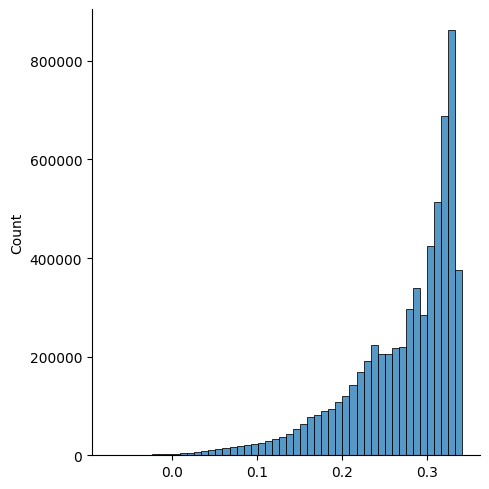

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(anomaly_score,bins=50)
plt.show()

- The anomaly score of the input samples. The lower, the more abnormal. Negative scores represent outliers, positive scores represent inliers.

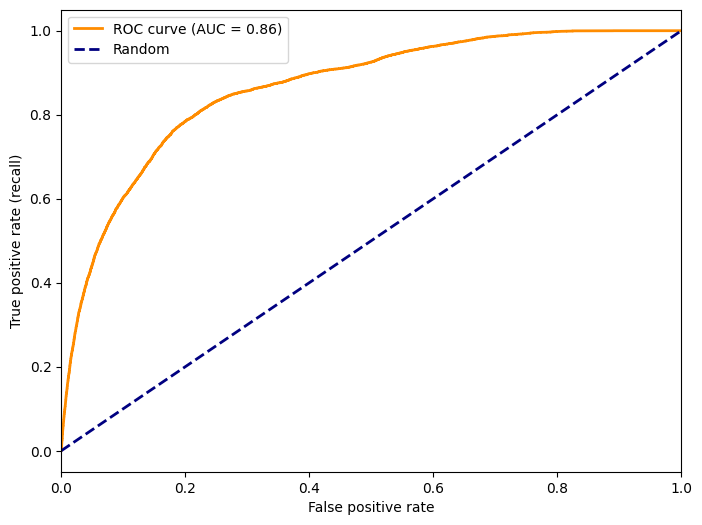

In [46]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# ROC curve - note: for Isolation Forest, lower scores = more anomalous
# So we use negative scores or reverse the labels
fpr, tpr, thresholds = roc_curve(df['isFraud'].values, -anomaly_score)  # Negative because lower scores = more anomalous
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate (recall)')
plt.legend()

- The result is quite good.